In [1]:
%matplotlib inline

from lark import Lark, tree

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
grammar = """
    start: complex_sentence

    NEGATION: "!"
    
    TRUE: "TRUE"
    FALSE: "FALSE"
    boolean: TRUE | FALSE
        
    MATERIAL_IMPLICATION: "->"
    MATERIAL_EQUIVALENCE: "<->"
    
    LOGICAL_CONJUNCTION: "AND"
    LOGICAL_DISJUNCTION: "OR"
    EXCLUSIVE_DISJUNCTION: "XOR"
            
    connector: MATERIAL_IMPLICATION
               | MATERIAL_EQUIVALENCE
               | LOGICAL_CONJUNCTION
               | LOGICAL_DISJUNCTION
               | EXCLUSIVE_DISJUNCTION
    
    ID: LETTER+
        
    atomic_sentence: ID
                     | boolean
    
    complex_sentence: atomic_sentence
                      | NEGATION complex_sentence
                      | "("? atomic_sentence " " connector " " atomic_sentence ")"?
                      | "["? atomic_sentence " " connector " " atomic_sentence "]"?
                      | "("? complex_sentence " " connector " " complex_sentence ")"?
                      | "["? complex_sentence " " connector " " complex_sentence "]"?
    
    %import common.LETTER
"""

In [4]:
prop_calc_parser = Lark(grammar, parser='earley')

perse = prop_calc_parser.parse(
    "([(A AND B) -> (C OR D)] AND [C <-> E] AND [!E AND !D]) -> [A -> !B]"
)

tree.pydot__tree_to_png(perse, "./Examples/arboles_de_forzamiento_semantico_manuel_sierra.png")

In [5]:
print(perse.pretty())

start
  complex_sentence
    complex_sentence
      complex_sentence
        complex_sentence
          complex_sentence
            atomic_sentence	A
            connector	AND
            atomic_sentence	B
          connector	->
          complex_sentence
            atomic_sentence	C
            connector	OR
            atomic_sentence	D
        connector	AND
        complex_sentence
          atomic_sentence	C
          connector	<->
          atomic_sentence	E
      connector	AND
      complex_sentence
        complex_sentence
          !
          complex_sentence
            atomic_sentence	E
        connector	AND
        complex_sentence
          !
          complex_sentence
            atomic_sentence	D
    connector	->
    complex_sentence
      complex_sentence
        atomic_sentence	A
      connector	->
      complex_sentence
        !
        complex_sentence
          atomic_sentence	B



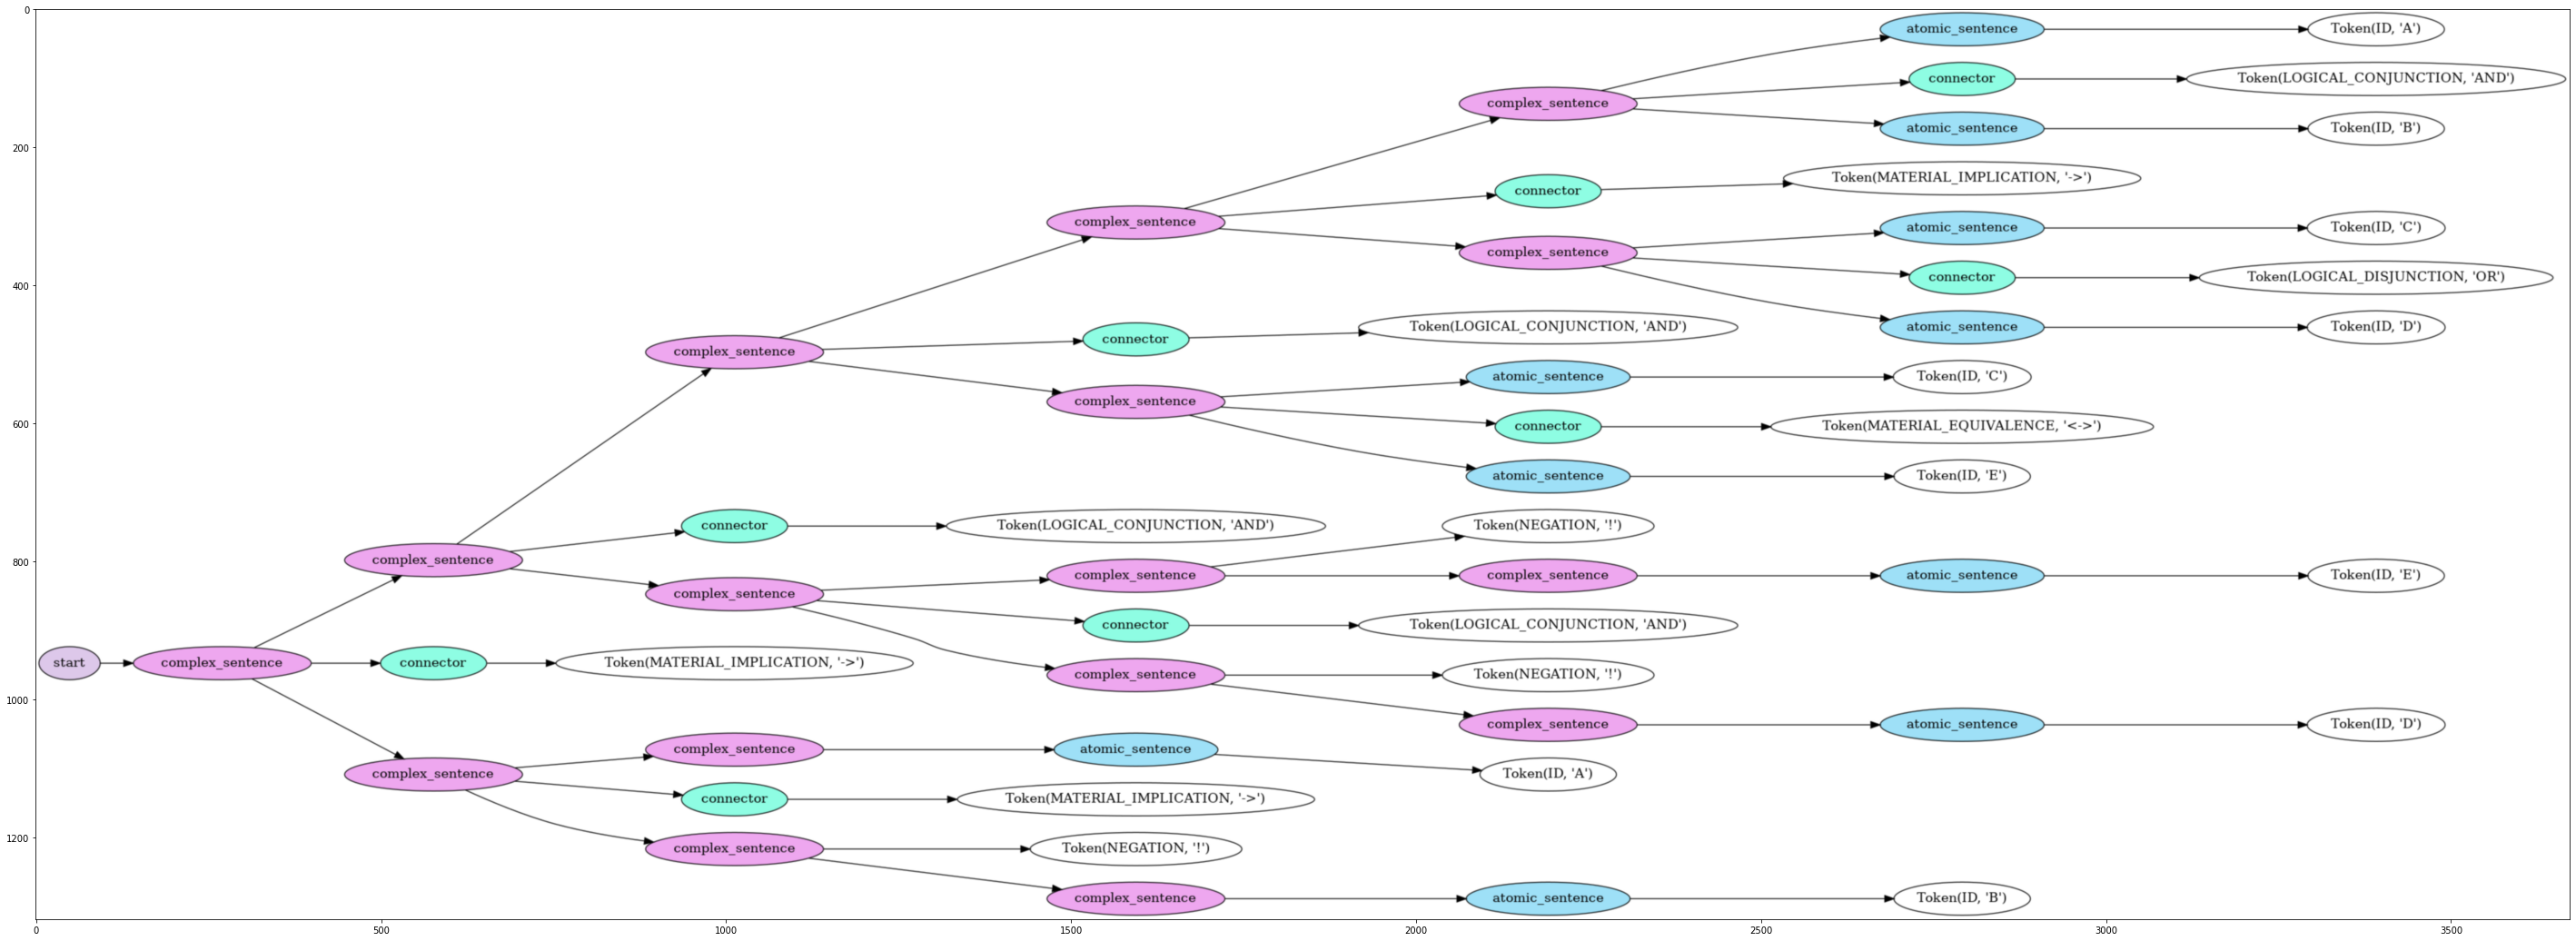

In [6]:
plt.rcParams['figure.figsize'] = (50, 60)

img = mpimg.imread(
    "./Examples/arboles_de_forzamiento_semantico_manuel_sierra.png"
)

_ = plt.imshow(img, interpolation="bicubic")